In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [28]:
PAD = pd.read_csv("/home/ali/Datasets/PAD-UFES-20/PAD-UFES-20.csv")
FITZ = pd.read_csv("/home/ali/Datasets/Fitz17k/fitzpatrick17k_preprocessed.csv")

In [25]:
grouped_df = FITZ.groupby(['high', 'fitzpatrick_scale']).size().reset_index(name='Count')

pivot_df = grouped_df.pivot(index='high', columns='fitzpatrick_scale', values='Count', ).fillna(0)
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df.loc['Total'] = pivot_df.sum()

pivot_df

fitzpatrick_scale,1,2,3,4,5,6,Total
high,,,,,,,
0,444,671,475,367,159,44,2160
1,453,742,456,301,147,61,2160
2,2050,3395,2377,2113,1227,530,11692
Total,2947,4808,3308,2781,1533,635,16012


In [27]:
grouped_df = PAD.groupby(['low', 'fitzpatrick_scale']).size().reset_index(name='Count')

pivot_df = grouped_df.pivot(index='low', columns='fitzpatrick_scale', values='Count', ).fillna(0)
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df.loc['Total'] = pivot_df.sum()

pivot_df

fitzpatrick_scale,1,2,3,4,5,Total
low,,,,,,
0,25.0,156.0,89.0,10.0,3.0,283.0
1,101.0,502.0,217.0,22.0,3.0,845.0
2,3.0,35.0,10.0,4.0,0.0,52.0
3,4.0,34.0,24.0,12.0,1.0,75.0
4,16.0,126.0,45.0,3.0,2.0,192.0
5,4.0,23.0,7.0,11.0,1.0,46.0
Total,153.0,876.0,392.0,62.0,10.0,1493.0


# GF3300

In [64]:
sample = np.load("/home/ali/Datasets/Harvard-GF3300/Training/data_0001.npz")

In [65]:
for key, val in sample.items():
    if key in ['rnflt', 'oct_bscans']:
        print(key, val.shape)
    else:
        print(key, val)

oct_bscans (200, 200, 200)
rnflt (200, 200)
md 0.66
glaucoma 0
tds [ 2.  3. -2.  2.  2.  0. -2. -1.  2.  0.  7.  1. -5. -1.  0.  2.  2.  3.
  3.  1.  1. -1.  0.  0. -1.  3.  4.  1.  1. -1.  0.  1.  1.  4.  3.  1.
  0. -1. -1.  1.  3.  0.  3.  0.  1.  0.  0.  3. -1.  1. -1.  2.]
race Asian
male 1
hispanic 0
language 0
maritalstatus 1
age 43.31232876712329


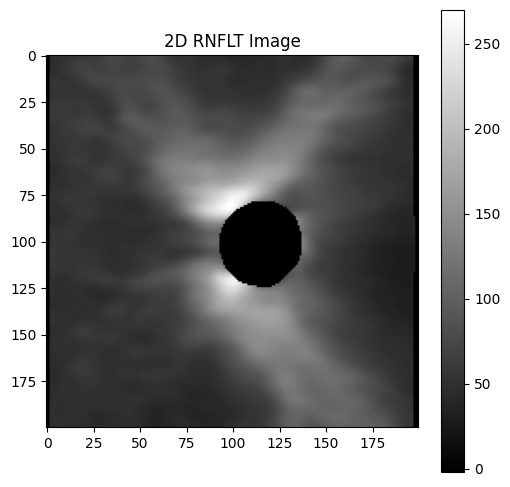

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data
rnflt = sample['rnflt']

# Plotting the 2D rnflt image
plt.figure(figsize=(6, 6))
plt.imshow(rnflt, cmap='gray')
plt.title('2D RNFLT Image')
plt.colorbar()
plt.show()

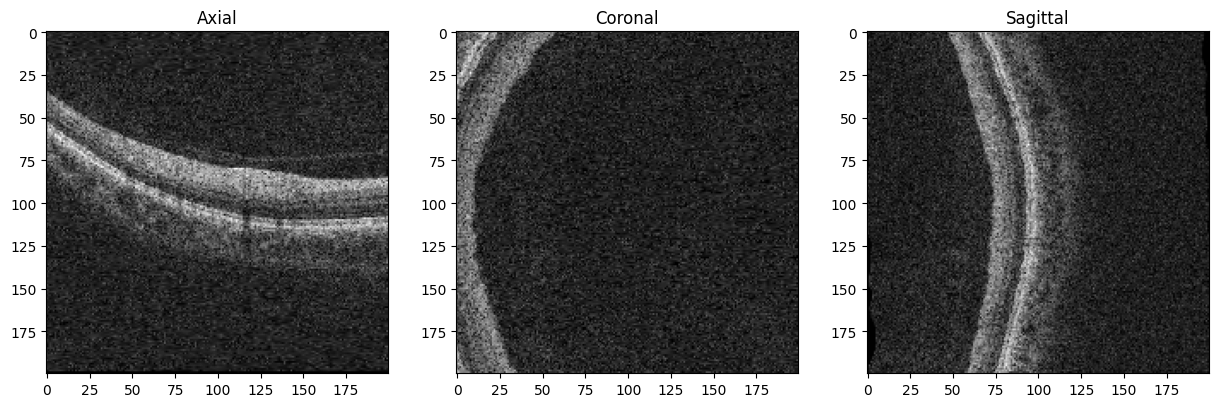

In [46]:

oct_bscans = sample['oct_bscans']
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the OCT scan from three different perspectives
axs[0].imshow(oct_bscans[50, :, :], cmap='gray')
axs[0].set_title('Axial')

axs[1].imshow(oct_bscans[:, 50, :], cmap='gray')
axs[1].set_title('Coronal')

axs[2].imshow(oct_bscans[:, :, 50], cmap='gray')
axs[2].set_title('Sagittal')

# Display the plot
plt.show()


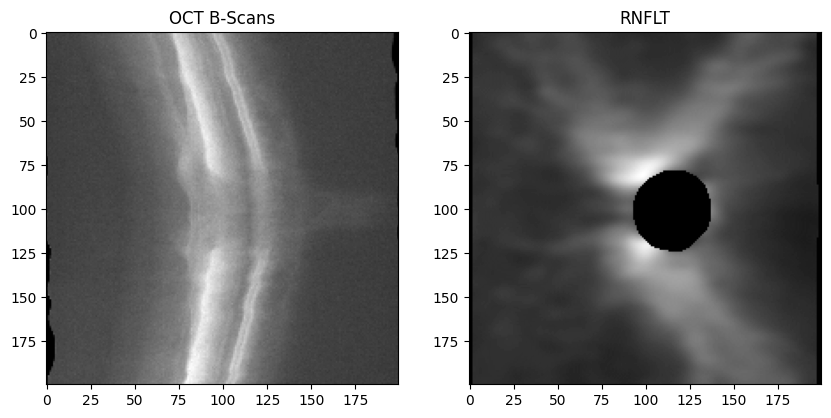

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean along the z-axis (axis=2) to get a 2D projection of the OCT scan
oct_projection = np.mean(oct_bscans, axis=2)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the 2D projection of the OCT scan
axs[0].imshow(oct_projection, cmap='gray')
axs[0].set_title('OCT B-Scans')

# Plot the RNFLT data
axs[1].imshow(rnflt, cmap='gray')
axs[1].set_title('RNFLT')

# Display the plot
plt.show()


In [51]:
import skimage

oct_bscans = sample['oct_bscans']
oct_img_array = []
for img in oct_bscans:
    oct_img_array.append(skimage.transform.resize(img, (200, 200)))
oct_img_array = np.stack(oct_img_array, axis=0)
oct_img = np.stack([oct_img_array]*(1), axis=0).astype(float)

In [52]:
oct_img.shape

(1, 200, 200, 200)

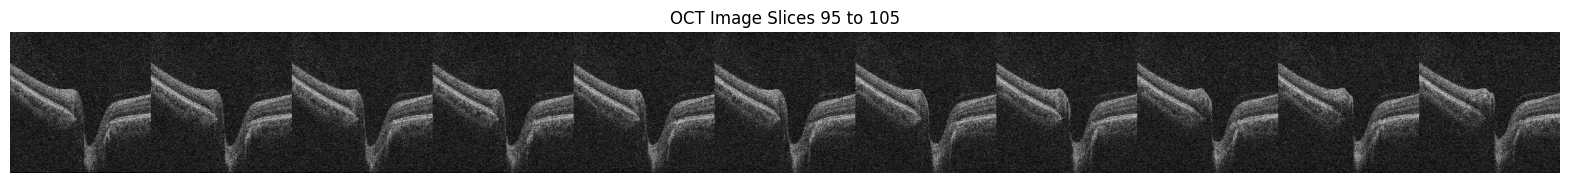

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming oct_img is a 4D array with shape (1, N, 200, 200)
# Extract the actual image data from the first dimension
oct_img_data = oct_img[0]

# Define the number of slices to show around the middle slice
num_slices = 5
middle_index = oct_img_data.shape[0] // 2

# Calculate the range of slices to display
start_index = max(middle_index - num_slices, 0)
end_index = min(middle_index + num_slices + 1, oct_img_data.shape[0])

# Extract the slices and concatenate them horizontally
slices_to_plot = oct_img_data[start_index:end_index]
concatenated_slices = np.concatenate(slices_to_plot, axis=1)  # Concatenate along width

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the concatenated image
ax.imshow(concatenated_slices, cmap='gray')
ax.set_title(f'OCT Image Slices {start_index} to {end_index - 1}')
ax.axis('off')  # Hide axes for a cleaner look

plt.show()


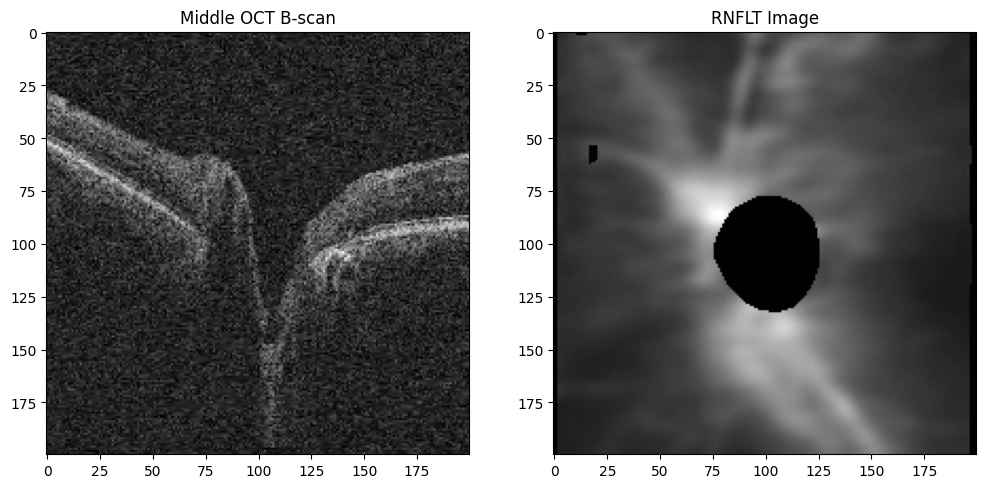

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sample data
sample = np.load("/home/ali/Datasets/Harvard-GF3300/Training/data_0003.npz")
oct_bscans = sample['oct_bscans']
rnflt = sample['rnflt']

# Get the middle slice of the OCT B-scans
middle_index = oct_bscans.shape[0] // 2
middle_bscan = oct_bscans[middle_index]

# Plot the middle OCT B-scan and the RNFLT image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the middle OCT B-scan
axs[0].imshow(middle_bscan, cmap='gray')
axs[0].set_title('Middle OCT B-scan')

# Plot the RNFLT image
axs[1].imshow(rnflt, cmap='gray')
axs[1].set_title('RNFLT Image')

# Display the plot
plt.show()


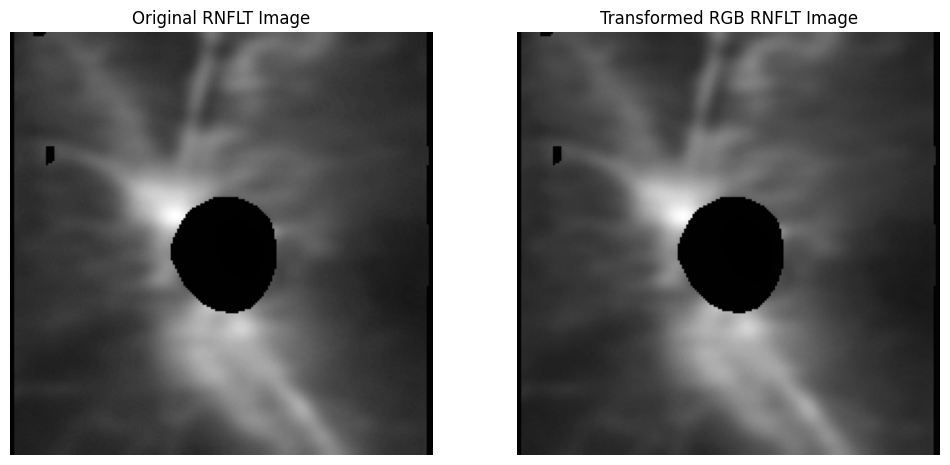

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms as T

# Load the RNFLT data from the .npz file
raw_data = np.load("/home/ali/Datasets/Harvard-GF3300/Training/data_0003.npz")
# Load the RNFLT data from the .npz file

rnflt = raw_data["rnflt"]

# Normalize the RNFLT data to the range [0, 255]
rnflt_normalized = (
    (rnflt - np.min(rnflt)) / (np.max(rnflt) - np.min(rnflt)) * 255
).astype(np.uint8)

# Convert the normalized RNFLT data to an RGB image by stacking it along the last dimension
rnflt_rgb = np.stack([rnflt_normalized] * 3, axis=-1)

# Convert to PIL Image
image = T.ToPILImage()(rnflt_rgb)

# Plotting the RNFLT images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original 2D RNFLT image
axs[0].imshow(rnflt, cmap='gray')
axs[0].set_title('Original RNFLT Image')
axs[0].axis('off')

# Plot the transformed RGB RNFLT image
axs[1].imshow(image)
axs[1].set_title('Transformed RGB RNFLT Image')
axs[1].axis('off')

# Display the plot
plt.show()


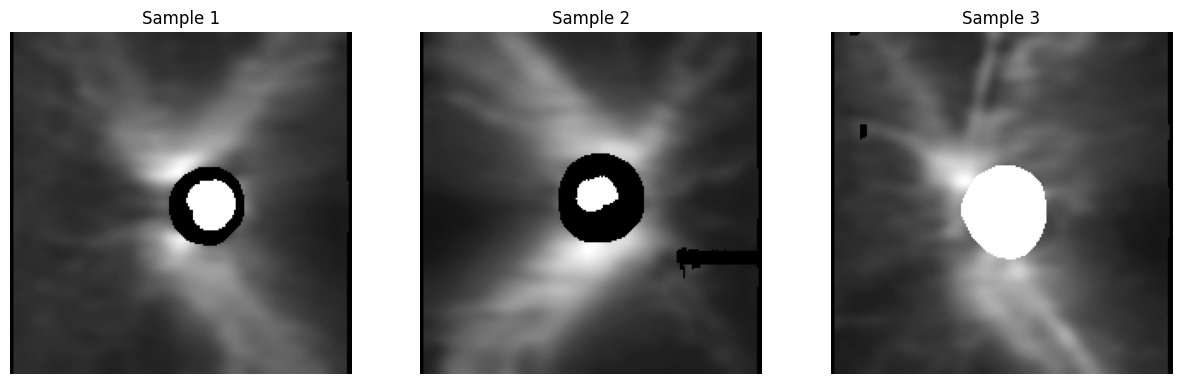

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def visualize_rnflt_images(file_paths):
    fig, axs = plt.subplots(1, len(file_paths), figsize=(15, 5))
    for i, file_path in enumerate(file_paths):
        sample = np.load(file_path)
        rnflt = sample['rnflt']
        rnflt_rgb = np.stack([rnflt] * 3, axis=-1)
        rnflt_rgb = (rnflt_rgb / rnflt_rgb.max() * 255).astype(np.uint8)
        rnflt_image = Image.fromarray(rnflt_rgb)
        axs[i].imshow(rnflt_image)
        axs[i].set_title(f'Sample {i + 1}')
        axs[i].axis('off')
    plt.show()

# List of file paths to different RNFLT images
file_paths = [
    "/home/ali/Datasets/Harvard-GF3300/Training/data_0001.npz",
    "/home/ali/Datasets/Harvard-GF3300/Training/data_0002.npz",
    "/home/ali/Datasets/Harvard-GF3300/Training/data_0003.npz"
]

visualize_rnflt_images(file_paths)
